In [1]:
import torch
import torch.optim as optim
import scipy.optimize as opt
import numpy as np


In [2]:
def density(x,alpha,beta):
    return x**(alpha-1) * (1-x)**(beta-1)

In [3]:
negative_density = lambda x, alpha, beta: -density(x, alpha, beta)
initial_guess = 0.5
alpha = 2
beta = 4
result = opt.minimize(negative_density, initial_guess, args=(alpha, beta))
mode = result.x[0]
print(f"Mode: {mode}")

Mode: 0.25


In [4]:
result.x

array([0.25])

In [ ]:
# def negetive_log_likelihood(x):
#     return -np.log(density(x, alpha, beta))

# log_likelihood_second_derivative = np.gradient(np.gradient(negetive_log_likelihood(result.x[0])))
# print(f"Second derivative of log likelihood at mode: {log_likelihood_second_derivative[0]}")

In [5]:
negetive_log_likelihood = lambda x,alpha,beta: -torch.log(density(x,alpha,beta))
alpha = torch.tensor(2.0,requires_grad=True)
beta = torch.tensor(4.0,requires_grad=True)
initial_guess = torch.tensor([0.5], requires_grad=True, dtype=torch.float64)
optimizer = torch.optim.Adam([initial_guess], lr=0.01)
num_steps = 1000
for step in range(num_steps):
    optimizer.zero_grad()  
    loss = negetive_log_likelihood(initial_guess, alpha, beta)
    loss.backward()  
    optimizer.step() 

mode = initial_guess.item()

print(f"Mode: {mode}")

Mode: 0.25


In [6]:
log_negetive_log_likelihood_second_derivative = -(alpha - 1) / mode**2 - (beta - 1) / (1 - mode)**2
variance = 1 / log_negetive_log_likelihood_second_derivative
variance = variance.detach().numpy()
print(f"Variance: {variance}")


Variance: -0.046875


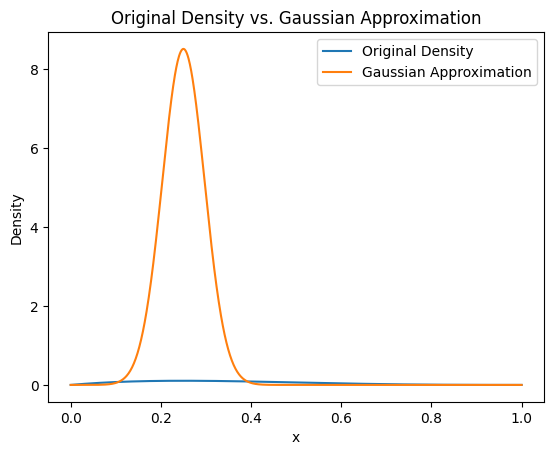

In [11]:
x_values = np.linspace(0, 1, 1000)
from matplotlib import pyplot as plt

# variance1=20
gaussian_approximation = (1/(np.sqrt(2 *  np.pi * variance**2))) * (np.exp(-0.5 *((x_values - mode) / variance)**2))
plt.plot(x_values, density(x_values, alpha.item(), beta.item()), label="Original Density")
plt.plot(x_values, gaussian_approximation, label="Gaussian Approximation")
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Original Density vs. Gaussian Approximation");


In [20]:

alpha_values = [2.0, 3.0, 4.0]
beta_values = [4.0, 5.0, 6.0]

variance_results = []
results = []

for alpha_val in alpha_values:
    for beta_val in beta_values:
        alpha = torch.tensor(alpha_val, requires_grad=True)
        beta = torch.tensor(beta_val, requires_grad=True)
        initial_guess = torch.tensor([0.5], requires_grad=True, dtype=torch.float64)
        optimizer = optim.Adam([initial_guess], lr=0.01)
        num_steps = 1000

        for step in range(num_steps):
            optimizer.zero_grad()  
            loss = negetive_log_likelihood(initial_guess, alpha, beta)
            loss.backward()  
            optimizer.step() 

        mode = initial_guess.item()
        log_likelihood_second_derivative = -(alpha - 1) / mode**2 - (beta - 1) / (1 - mode)**2
        variance = 1 / log_likelihood_second_derivative
        variance_results.append((alpha_val, beta_val, mode, variance))

for i, (alpha_val, beta_val, mode, variance) in enumerate(variance_results[:5]):
    print(f"Variance {i+1}: Alpha={alpha_val}, Beta={beta_val}, Mode={mode}, Variance={variance}")


Variance 1: Alpha=2.0, Beta=4.0, Mode=0.25, Variance=-0.046875
Variance 2: Alpha=2.0, Beta=5.0, Mode=0.19999999999999998, Variance=-0.03200000151991844
Variance 3: Alpha=2.0, Beta=6.0, Mode=0.16666666666666669, Variance=-0.023148147389292717
Variance 4: Alpha=3.0, Beta=4.0, Mode=0.39999999999999997, Variance=-0.04800000414252281
Variance 5: Alpha=3.0, Beta=5.0, Mode=0.3333333333333333, Variance=-0.03703703731298447


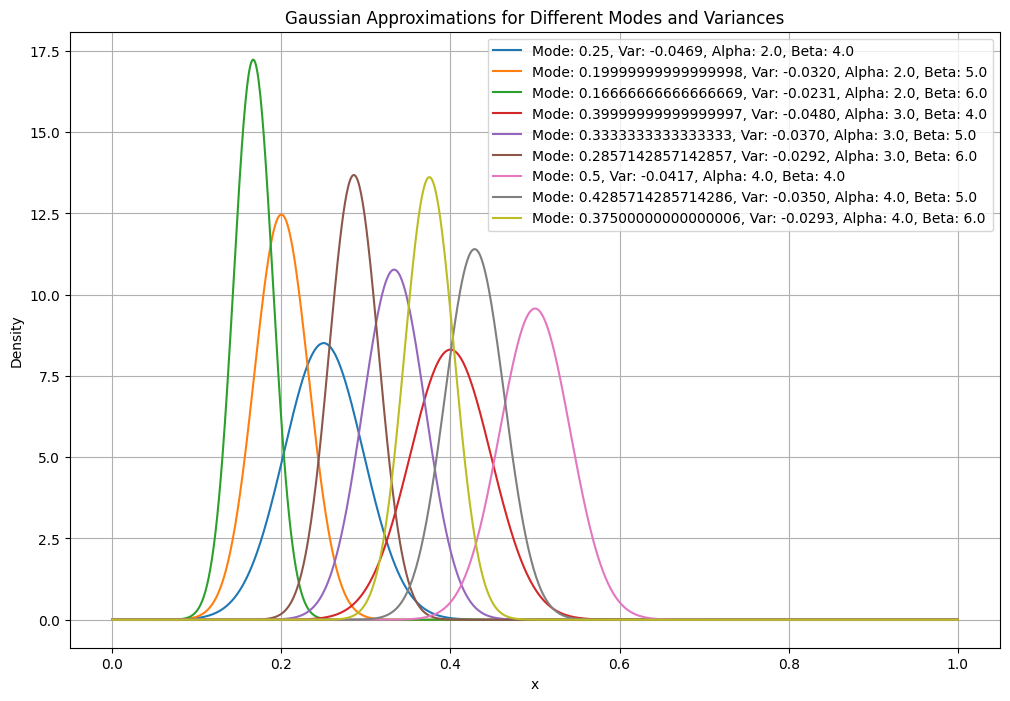

In [21]:
# plt.figure(figsize=(12, 8))

# for i, (alpha_val, beta_val, mode, variance) in enumerate(variance_results):
#     variance_np = variance.detach().numpy()
    
#     gaussian_approximation = (1 / (np.sqrt(2 * np.pi * variance_np**2))) * (np.exp(-0.5 * ((x_values - mode) / variance_np)**2))
    
#     plt.plot(x_values, gaussian_approximation, label=f"Mode: {mode}, Var: {variance_np:.4f}, Alpha: {alpha_val}, Beta: {beta_val}")

# plt.xlabel("x")
# plt.ylabel("Density")
# plt.title("Gaussian Approximations for Different Modes and Variances")
# plt.legend()
# plt.grid(True)
